In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('dataset_final.csv')

In [3]:
df

,Unnamed: 0.1,Unnamed: 0,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,0,02/01/2019,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,1,03/01/2019,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,2,04/01/2019,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,3,05/01/2019,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,4,06/01/2019,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,498,01/12/2020,130.8,126.0,220.4,77.3,322.8,36.5,25.4,45.4,...,105.7,172.6,1.4,2.1,20.4,2.1,5.4,1.8,2.0,2.4
499,499,02/12/2020,129.4,127.3,218.4,81.3,331.4,37.0,25.8,45.2,...,112.3,174.4,1.5,2.1,23.3,2.4,5.4,1.6,2.1,3.3
500,500,03/12/2020,132.1,129.7,205.6,85.6,336.7,37.8,26.2,45.2,...,113.0,169.8,1.4,2.1,21.7,2.3,5.4,1.5,2.0,3.6
501,501,04/12/2020,132.1,128.4,207.0,83.9,334.6,38.2,27.0,43.0,...,111.6,145.5,1.2,2.0,24.2,2.5,5.7,1.6,2.0,3.3


In [14]:
df['Punjab'][0:10]

0    119.9
1    121.9
2    118.8
3    121.0
4    121.4
5    118.0
6    107.5
7    132.5
8    131.5
9    130.3
Name: Punjab, dtype: float64

In [15]:
def preprocess_energy_data(df):
    # Step 1: Parse date and extract temporal features
    df['Date'] = pd.to_datetime(df['Unnamed: 0'],format='%d/%m/%Y')
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    df['Weekday'] = df['Date'].dt.weekday
    df['Is_Weekend'] = df['Weekday'].isin([5, 6]).astype(int)
    df['Week_of_Year'] = df['Date'].dt.isocalendar().week

    # Add custom seasonality feature
    def get_season(month):
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Summer'
        elif month in [6, 7, 8, 9]:
            return 'Monsoon'
        else:
            return 'Autumn'

    df['Season'] = df['Month'].apply(get_season)
    
    # # Step 2: Feature engineering for all state columns
    # state_columns = df.columns[1:-10]  # Assuming last 10 columns are not state-specific
    
    # for state in state_columns:
    #     # Rolling averages
    #     df[f'{state}_RollingMean_7d'] = df[state].rolling(window=7).mean()
    #     df[f'{state}_RollingMean_30d'] = df[state].rolling(window=30).mean()

    #     # Rolling standard deviations
    #     df[f'{state}_RollingStd_7d'] = df[state].rolling(window=7).std()

    #     # Lag features
    #     df[f'{state}_Lag_1'] = df[state].shift(1)
    #     df[f'{state}_Lag_7'] = df[state].shift(7)

    #     # Difference features
    #     df[f'{state}_Diff_1'] = df[state] - df[f'{state}_Lag_1']

    # Step 3: One-hot encode the Season column
    df = pd.get_dummies(df, columns=['Season'], drop_first=True)

    # Step 4: Drop any rows with NaN values (due to rolling/lags)
    df = df.dropna()

    return df


In [16]:
preprocess_energy_data(df)

,Unnamed: 0.1,Unnamed: 0,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,...,Date,Day,Month,Year,Weekday,Is_Weekend,Week_of_Year,Season_Monsoon,Season_Summer,Season_Winter
0,0,02/01/2019,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,...,2019-01-02,2,1,2019,2,0,1,False,False,True
1,1,03/01/2019,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,...,2019-01-03,3,1,2019,3,0,1,False,False,True
2,2,04/01/2019,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,...,2019-01-04,4,1,2019,4,0,1,False,False,True
3,3,05/01/2019,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,...,2019-01-05,5,1,2019,5,1,1,False,False,True
4,4,06/01/2019,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,...,2019-01-06,6,1,2019,6,1,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,498,01/12/2020,130.8,126.0,220.4,77.3,322.8,36.5,25.4,45.4,...,2020-12-01,1,12,2020,1,0,49,False,False,True
499,499,02/12/2020,129.4,127.3,218.4,81.3,331.4,37.0,25.8,45.2,...,2020-12-02,2,12,2020,2,0,49,False,False,True
500,500,03/12/2020,132.1,129.7,205.6,85.6,336.7,37.8,26.2,45.2,...,2020-12-03,3,12,2020,3,0,49,False,False,True
501,501,04/12/2020,132.1,128.4,207.0,83.9,334.6,38.2,27.0,43.0,...,2020-12-04,4,12,2020,4,0,49,False,False,True


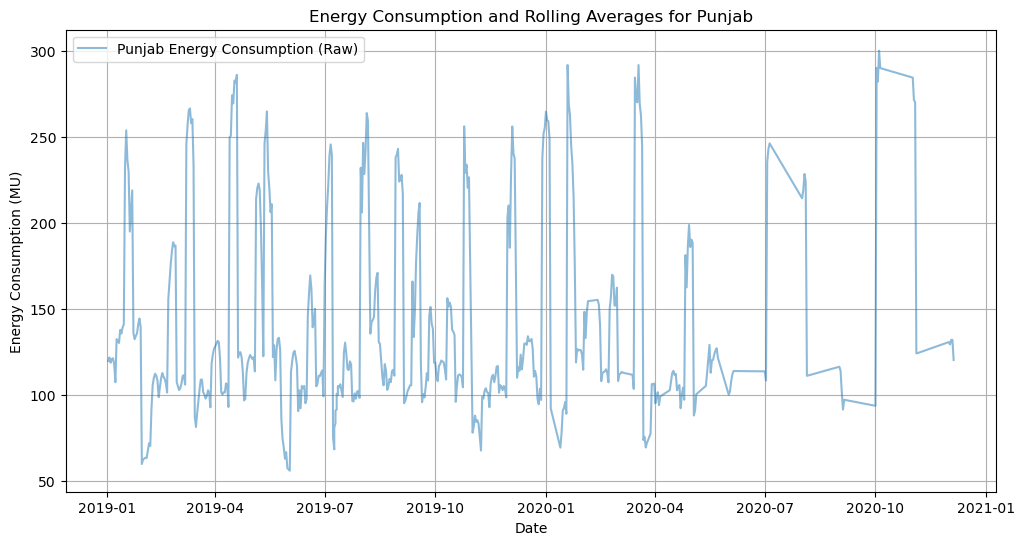

In [17]:
import matplotlib.pyplot as plt

# Example: Visualizing Punjab's rolling averages
def visualize_state_features(df, state):
    plt.figure(figsize=(12, 6))
    
    # Plot raw energy consumption
    plt.plot(df['Date'], df[state], label=f'{state} Energy Consumption (Raw)', alpha=0.5)
    
    # # Plot rolling averages
    # plt.plot(df['Date'], df[f'{state}_RollingMean_7d'], label='7-Day Rolling Mean', linestyle='--')
    # plt.plot(df['Date'], df[f'{state}_RollingMean_30d'], label='30-Day Rolling Mean', linestyle='--')
    
    plt.xlabel('Date')
    plt.ylabel('Energy Consumption (MU)')
    plt.title(f'Energy Consumption and Rolling Averages for {state}')
    plt.legend()
    plt.grid()
    plt.show()

# Example for Punjab
visualize_state_features(df, 'Punjab')


In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Prepare features and target
def prepare_lstm_data(df, state, look_back=30):
    # Select the relevant features for the state
    features = [col for col in df.columns if state in col or col in ['Day', 'Month', 'Year', 'Is_Weekend']]
    target = state
    
    # Normalize the features
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df[features])
    
    # Create sliding windows
    X, y = [], []
    for i in range(look_back, len(scaled_data)):
        X.append(scaled_data[i-look_back:i])  # Input sequence
        y.append(df[target].iloc[i])          # Corresponding target
    
    # Convert to numpy arrays
    X, y = np.array(X), np.array(y)
    return X, y, scaler

# Example for Punjab
X, y, scaler = prepare_lstm_data(df, 'Punjab')


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define LSTM model
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(32, return_sequences=False),
        Dense(16, activation='relu'),
        Dense(1)  # Output layer for single value prediction
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create and summarize the model
model = create_lstm_model((X.shape[1], X.shape[2]))
model.summary()


2024-11-15 14:46:48.049135: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-15 14:46:48.100756: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-15 14:46:48.910935: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-11-15 14:46:51.182113: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38 MB memory:  -> device: 0, name: Quadro P5000, pci bus id: 0000:3b:00.0, compute capability: 6.1
2

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            17920     
                                                                 
 dropout (Dropout)           (None, 30, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 30881 (120.63 KB)
Trainable params: 30881 (120.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50


2024-11-15 14:47:29.878811: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2024-11-15 14:47:29.995621: E tensorflow/compiler/xla/stream_executor/dnn.cc:1133] CUDNN_STATUS_INTERNAL_ERROR
in tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc(2153): 'cudnnRNNForwardTraining( cudnn.handle(), rnn_desc.handle(), model_dims.max_seq_length, input_desc.handles(), input_data.opaque(), input_h_desc.handle(), input_h_data.opaque(), input_c_desc.handle(), input_c_data.opaque(), rnn_desc.params_handle(), params.opaque(), output_desc.handles(), output_data->opaque(), output_h_desc.handle(), output_h_data->opaque(), output_c_desc.handle(), output_c_data->opaque(), workspace.opaque(), workspace.size(), reserve_space.opaque(), reserve_space.size())'
2024-11-15 14:47:29.995688: W tensorflow/core/framework/op_kernel.cc:1828] OP_REQUIRES failed at cudnn_rnn_ops.cc:1769 : INTERNAL: Failed to call ThenRnnForward with model config: [rnn_mode, rnn_input_mode, rn

InternalError: Graph execution error:

Failed to call ThenRnnForward with model config: [rnn_mode, rnn_input_mode, rnn_direction_mode]: 2, 0, 0 , [num_layers, input_size, num_units, dir_count, max_seq_length, batch_size, cell_num_units]: [1, 5, 64, 1, 30, 32, 64] 
	 [[{{node CudnnRNN}}]]
	 [[sequential/lstm/PartitionedCall]] [Op:__inference_train_function_5998]

In [ ]:
# Function to predict for future dates
def predict_next_year(df, state, model, scaler, look_back=30, steps=365):
    # Prepare the initial input
    features = [col for col in df.columns if state in col or col in ['Day', 'Month', 'Year', 'Is_Weekend']]
    scaled_data = scaler.transform(df[features])
    initial_input = scaled_data[-look_back:]  # Use last available data as starting point

    predictions = []
    for _ in range(steps):
        # Reshape input for LSTM
        input_sequence = np.expand_dims(initial_input, axis=0)
        
        # Predict and append
        pred = model.predict(input_sequence)[0, 0]
        predictions.append(pred)
        
        # Update input with the new prediction (autoregressive behavior)
        new_input = np.append(initial_input[1:], [[pred]], axis=0)
        initial_input = new_input

    return predictions

# Predict next year's consumption for Punjab
predicted_punjab = predict_next_year(df, 'Punjab', model, scaler)


In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Punjab'], label='Actual Energy Consumption')
future_dates = pd.date_range(df['Date'].iloc[-1], periods=365, freq='D')
plt.plot(future_dates, predicted_punjab, label='Predicted Energy Consumption', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Energy Consumption (MU)')
plt.title('Punjab Energy Consumption Prediction')
plt.legend()
plt.grid()
plt.show()
